In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

#### 1

In [3]:
def custom_conv2d(image, kernel):

    image_height, image_width = image.shape[:2]
    kernel_height, kernel_width = kernel.shape[:2]

    if kernel_height % 2 == 0 or kernel_width % 2 == 0:
        raise ValueError("Kernel dimensions must be odd")

    output_image = np.zeros_like(image)

    padding_vertical = kernel_height // 2
    padding_horizontal = kernel_width // 2

    padded_image = np.pad(image, ((padding_vertical, padding_vertical), (padding_horizontal, padding_horizontal), (0, 0)), mode='constant')

    for y in range(image_height):
        for x in range(image_width):
            output_image[y, x] = np.sum(padded_image[y:y+kernel_height, x:x+kernel_width] * kernel)

    return output_image

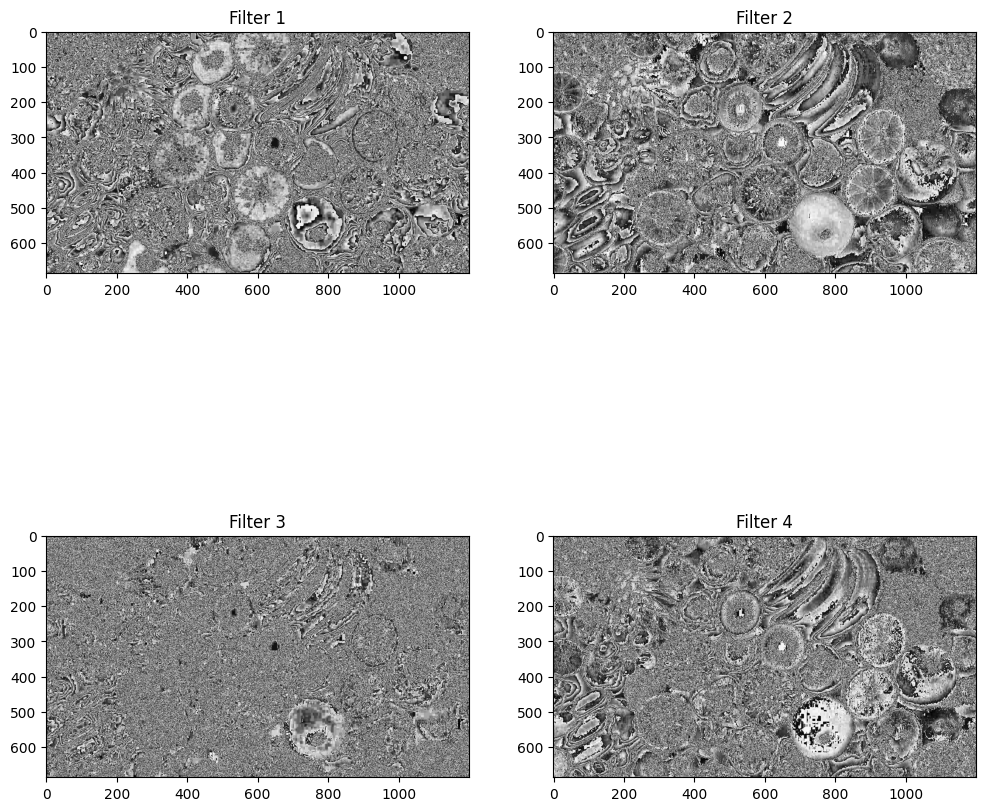

In [4]:
image = cv2.imread('fruits.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

filter1 = np.array([[1, 0, -1],
                    [1, 0, -1],
                    [1, 0, -1]])

filter2 = np.array([[0, 1, 0],
                    [1, -4, 1],
                    [0, 1, 0]])

filter3 = np.array([[-1, -1, -1],
                    [-1, 8, -1],
                    [-1, -1, -1]])

filter4 = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])

output1 = custom_conv2d(image, filter1)
output2 = custom_conv2d(image, filter2)
output3 = custom_conv2d(image, filter3)
output4 = custom_conv2d(image, filter4)

plt.figure(figsize=(12, 12))

plt.subplot(221)
plt.imshow(output1, cmap='gray')
plt.title('Filter 1')

plt.subplot(222)
plt.imshow(output2, cmap='gray')
plt.title('Filter 2')

plt.subplot(223)
plt.imshow(output3, cmap='gray')
plt.title('Filter 3')

plt.subplot(224)
plt.imshow(output4, cmap='gray')
plt.title('Filter 4')

plt.show()


#### 2

In [30]:
def pool_forward(A_prev, hparameters, mode = "max"):
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    f = hparameters["f"]
    stride = hparameters["stride"]
    n_H = int(1 + (n_H_prev - f) / stride)
    n_W = int(1 + (n_W_prev - f) / stride)
    n_C = n_C_prev
    A = np.zeros((m, n_H, n_W, n_C))
    for i in range(m):
        for h in range(n_H):
            for w in range(n_W):
                for c in range (n_C):
                    vert_start = h * stride
                    vert_end = vert_start + f
                    horiz_start = w * stride
                    horiz_end = horiz_start + f
                    a_prev_slice = A_prev[i, vert_start:vert_end, horiz_start:horiz_end, c]
                    if mode == "max":
                        A[i, h, w, c] = np.max(a_prev_slice)
                    elif mode == "average":
                        A[i, h, w, c] = np.mean(a_prev_slice)

    cache = (A_prev, hparameters)
    return A, cache


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mode = max
A.shape = (10, 12, 12, 3)
mode = average
A.shape = (10, 12, 12, 3)


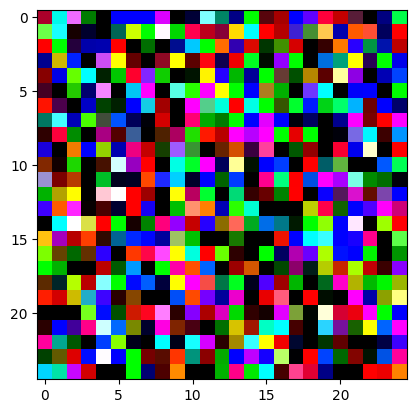

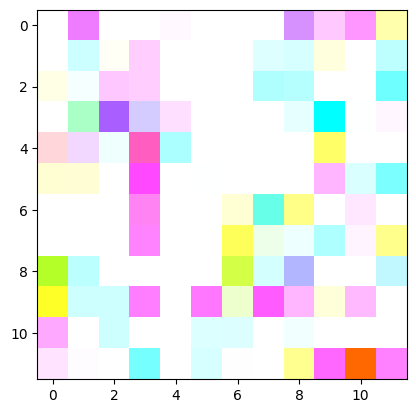

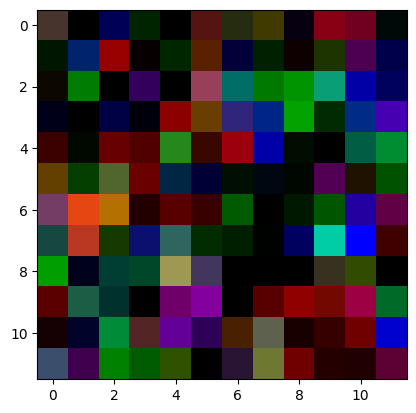

In [32]:
A_prev = np.random.randn(10,25,25,3)
hparameters = {"stride" : 2, "f": 3}
plt.figure()
plt.imshow(A_prev[0])
A, cache = pool_forward(A_prev, hparameters)
plt.figure()
plt.imshow(A[0])
print("mode = max")
print("A.shape =", A.shape)
A, cache = pool_forward(A_prev, hparameters, mode = "average")
plt.figure()
plt.imshow(A[0])
print("mode = average")
print("A.shape =", A.shape)

In [18]:

def convolution(image, kernel, padding):
    height, width, _ = image.shape
    num_filters, kernel_height, kernel_width, _ = kernel.shape
    pad_height, pad_width = padding

    output_height = height - kernel_height + 2 * pad_height + 1
    output_width = width - kernel_width + 2 * pad_width + 1

    padded_image = np.zeros((height + 2 * pad_height, width + 2 * pad_width, 3))
    padded_image[pad_height:-pad_height, pad_width:-pad_width, :] = image

    output = np.zeros((output_height, output_width, num_filters))

    for y in range(output_height):
        for x in range(output_width):
            for f in range(num_filters):
                output[y, x, f] = np.sum(padded_image[y:y+kernel_height, x:x+kernel_width, :] * kernel[f])

    return output

def batch_norm(input_tensor):
    epsilon = 1e-5
    mean = np.mean(input_tensor)
    variance = np.var(input_tensor)
    normalized_input = (input_tensor - mean) / np.sqrt(variance + epsilon)
    return normalized_input

def relu(input_tensor):
    return np.maximum(0, input_tensor)

def forward_pass(image, filters, padding):
    conv_output = convolution(image, filters, padding)
    conv_output_norm = batch_norm(conv_output)
    conv_output_relu = relu(conv_output_norm)
    return conv_output_relu

# تعریف تصویر و فیلتر
image = cv2.imread('fruits.jpg')
filter_size = 3
filters = np.random.randn(4, filter_size, filter_size, 3)
padding = (1, 1)  # پدینگ یکسان در هر دو سمت

output = forward_pass(image, filters, padding)

print(output)



[[[0.35310051 0.27221969 0.29028691 0.        ]
  [0.         0.32629901 0.63331588 0.        ]
  [0.         0.38143745 0.61071072 0.        ]
  ...
  [0.         0.30555289 0.48295379 0.        ]
  [0.         0.19446319 0.35332462 0.        ]
  [0.         0.10990188 0.2144018  0.        ]]

 [[0.         0.39408335 0.54212333 0.        ]
  [0.         0.39205409 1.02124338 0.        ]
  [0.         0.46705217 1.2250847  0.        ]
  ...
  [0.         0.28768846 0.71862408 0.        ]
  [0.         0.22742294 0.54157828 0.        ]
  [0.         0.17132055 0.35353286 0.        ]]

 [[0.         0.43228906 0.59098651 0.        ]
  [0.         0.42661789 1.14248621 0.        ]
  [0.         0.49893397 1.25041774 0.        ]
  ...
  [0.         0.28947583 0.72842186 0.        ]
  [0.         0.2364097  0.56716554 0.        ]
  [0.         0.19356121 0.37644714 0.        ]]

 ...

 [[0.         0.54129553 0.79223744 0.        ]
  [0.         0.67860622 1.5129153  0.        ]
  [0.     

##### ب

In [14]:
def relu(input_tensor):
    return np.maximum(0, input_tensor)

In [21]:
def forward_pass(image, filters, padding):
    conv_output = convolution(image, filters, padding)
    conv_output_relu = relu(conv_output)
    return conv_output_relu


filter_size = 3
filters = np.random.randn(12, filter_size, filter_size, 3) 
padding = (1, 1) 

# اعمال لایه کانولوشن جدید
output = forward_pass(image, filters, padding)

# چاپ خروجی
print(output)

[[[   0.          369.33999237  341.80575726 ...  289.84120701
      0.            0.        ]
  [   0.          633.35239726  155.47146507 ...  431.3647417
      0.            0.        ]
  [ 103.60737913  494.62972136    0.         ...  219.70747036
      0.            0.        ]
  ...
  [ 195.26913507  314.58709356    0.         ...  255.00654245
      0.            0.        ]
  [ 180.83225129  205.80869003    0.         ...  141.75044595
      6.97247366    0.        ]
  [ 128.76080533   84.20308372    0.         ...   58.08424983
     67.29199154    0.        ]]

 [[   0.          722.98872298  409.85778022 ...  730.45757235
      0.            0.        ]
  [  80.9684839  1033.34036712    0.         ...  848.02808487
      0.            0.        ]
  [  81.20051987 1136.38457606    0.         ...  852.5404664
      0.            0.        ]
  ...
  [ 143.98585554  821.43183941    0.         ...  642.90239444
      0.            0.        ]
  [ 100.35031185  600.52157025    0.  

##### ج

In [19]:
def max_pooling(input_tensor, pool_size, stride):
    height, width, depth = input_tensor.shape
    pool_height, pool_width = pool_size
    stride_height, stride_width = stride

    output_height = (height - pool_height) // stride_height + 1
    output_width = (width - pool_width) // stride_width + 1
    output_depth = depth

    output = np.zeros((output_height, output_width, output_depth))

    for y in range(output_height):
        for x in range(output_width):
            for d in range(output_depth):
                output[y, x, d] = np.max(input_tensor[y*stride_height:y*stride_height+pool_height, x*stride_width:x*stride_width+pool_width, d])

    return output

def forward_pass(image, filters, padding):
    conv_output = convolution(image, filters, padding)
    conv_output_norm = batch_norm(conv_output)
    conv_output_relu = relu(conv_output_norm)
    pooled_output = max_pooling(conv_output_relu, pool_size=(2, 2), stride=(2, 2))
    return pooled_output

# تعریف تصویر و فیلتر
filter_size = 3
filters = np.random.randn(12, filter_size, filter_size, 3)
padding = (1, 1)  # پدینگ یکسان در هر دو سمت

# اعمال لایه‌ها
output = forward_pass(image, filters, padding)

# چاپ خروجی
print(output)

[[[0.35747763 1.61943715 0.47034348 ... 0.         1.45621476 0.55063099]
  [0.         1.44742993 0.         ... 0.         1.42722218 0.57019245]
  [0.         1.81401706 0.         ... 0.         1.53982828 0.67231493]
  ...
  [0.         1.22605623 0.         ... 0.         1.33041882 0.9223017 ]
  [0.         1.10255734 0.         ... 0.         1.18536771 0.63352578]
  [0.06984878 0.60614293 0.1412057  ... 0.29239772 0.85900928 0.54927352]]

 [[0.21115616 1.80342405 0.45056034 ... 0.         1.58028192 0.62410529]
  [0.         1.52609747 0.         ... 0.         1.55543877 0.71377352]
  [0.         1.87698191 0.         ... 0.         1.84336628 0.69029532]
  ...
  [0.         1.35570028 0.         ... 0.         1.42548214 0.79987319]
  [0.         0.9993266  0.         ... 0.         0.99892855 0.70139742]
  [0.04206518 0.67783433 0.06356429 ... 0.02212475 0.79418194 0.54662995]]

 [[0.28293593 1.8828182  0.47591076 ... 0.         1.60618479 0.71665295]
  [0.01317724 1.829336

#### د

In [20]:
def forward_pass(image, filters, padding):
    conv_output = convolution(image, filters, padding)
    conv_output_norm = batch_norm(conv_output)
    conv_output_relu = relu(conv_output_norm)
    return conv_output_relu

# تعریف تصویر و فیلتر
filter_size = 3
filters = np.random.randn(16, filter_size, filter_size, 3)  # 16 فیلتر جدید
padding = (1, 1)  # پدینگ یکسان در هر دو سمت

# اعمال لایه کانولوشن
output = forward_pass(image, filters, padding)

# چاپ خروجی
print(output)

[[[1.02418566e+00 6.43967424e-01 0.00000000e+00 ... 3.25640510e-02
   0.00000000e+00 0.00000000e+00]
  [5.92377081e-01 1.02633005e+00 0.00000000e+00 ... 4.85944591e-01
   0.00000000e+00 0.00000000e+00]
  [4.18168066e-01 1.21883470e+00 0.00000000e+00 ... 5.54489192e-01
   0.00000000e+00 0.00000000e+00]
  ...
  [3.40463132e-01 1.16989105e+00 0.00000000e+00 ... 8.85505275e-01
   4.06794136e-02 4.24682445e-02]
  [3.27210077e-01 1.07191091e+00 2.33137790e-01 ... 9.40775187e-01
   2.55924771e-01 2.82002071e-01]
  [3.84385284e-01 9.07047491e-01 5.76208550e-01 ... 9.95318479e-01
   5.31940048e-01 5.77862989e-01]]

 [[8.32903588e-01 8.77206485e-01 0.00000000e+00 ... 1.19897400e-01
   0.00000000e+00 0.00000000e+00]
  [8.99272227e-02 1.01021523e+00 0.00000000e+00 ... 2.54274548e-02
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 1.09073338e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  ...
  [6.19141722e-03 9.05656939e-01 0.00000000e+00 ... 4.36349612e-01
   0.00000

#### ه

In [22]:
def forward_pass(image, filters, padding):
    conv_output = convolution(image, filters, padding)
    conv_output_relu = relu(conv_output)
    return conv_output_relu

# تعریف تصویر و فیلتر
filter_size = 3
filters = np.random.randn(16, filter_size, filter_size, 3)  # 16 فیلتر جدید
padding = (1, 1)  # پدینگ یکسان در هر دو سمت

# اعمال لایه کانولوشن
output = forward_pass(image, filters, padding)

# چاپ خروجی
print(output)

[[[ 271.98146265    0.            0.         ...    0.
    113.53416509  578.43586331]
  [ 180.9101211     0.            0.         ...   52.33802787
      7.65764437  869.99913528]
  [ 274.40331947    0.            0.         ...   60.77146848
      0.          980.07995999]
  ...
  [ 116.95477853    0.            0.         ...  190.3678925
      0.          645.55308716]
  [  54.19095728    0.            0.         ...  149.97283943
      0.          487.45411346]
  [   0.            0.            0.         ...  138.60703558
      0.          246.06529993]]

 [[ 634.67858644    0.            0.         ...  430.74775803
    396.75311192  509.51908414]
  [ 573.50281561    0.            0.         ...  537.33317377
    717.96713602  962.56679317]
  [ 682.51468145    0.            0.         ...  451.67260517
    960.89880399  945.46571186]
  ...
  [ 321.77033579    0.            0.         ...  345.25509828
    730.43774992  586.9560221 ]
  [ 192.90178779    0.            0.         

#### و

In [24]:
def max_pooling(input_tensor, pool_size, stride):
    height, width, depth = input_tensor.shape
    pool_height, pool_width = pool_size
    stride_height, stride_width = stride

    output_height = (height - pool_height) // stride_height + 1
    output_width = (width - pool_width) // stride_width + 1
    output_depth = depth

    output = np.zeros((output_height, output_width, output_depth))

    for y in range(output_height):
        for x in range(output_width):
            for d in range(output_depth):
                output[y, x, d] = np.max(input_tensor[y*stride_height:y*stride_height+pool_height, x*stride_width:x*stride_width+pool_width, d])

    return output

def dropout(input_tensor, dropout_prob):
    dropout_mask = np.random.binomial(1, 1 - dropout_prob, size=input_tensor.shape)
    dropout_output = input_tensor * dropout_mask
    return dropout_output

def forward_pass(image, filters, padding, dropout_prob):
    conv_output = convolution(image, filters, padding)
    conv_output_relu = relu(conv_output)
    pooled_output = max_pooling(conv_output_relu, pool_size=(2, 2), stride=(2, 2))
    dropout_output = dropout(pooled_output, dropout_prob)
    return dropout_output

filter_size = 3
num_filters = 16
filters = np.random.randn(num_filters, filter_size, filter_size, 3)
padding = (1, 1) 
dropout_prob = 0.05 

output = forward_pass(image, filters, padding, dropout_prob)

print(output)

[[[  0.         230.10658607   0.         ... 107.21588746  70.16543046
   265.0115665 ]
  [ 31.06030115 453.7532319    0.         ... 170.3693624    0.
   385.93954667]
  [  0.         505.99238155   0.         ... 189.41263282 141.94711262
   429.84457022]
  ...
  [348.44458345 494.13323705   0.         ... 162.4127765   76.40205932
   573.1310444 ]
  [156.31495407 470.89757014   0.         ... 118.85534677  70.49865274
   342.06192609]
  [202.60153114 341.49035004   0.         ...  82.21185781   0.
   131.23396303]]

 [[  0.         447.77953598   0.         ...   0.          88.66309437
     0.        ]
  [150.18588872 589.25185418   0.         ...   0.          59.9878652
     0.        ]
  [  0.         590.22146449   0.         ...   0.         157.76809165
     0.        ]
  ...
  [185.58069736 544.77470966   0.         ...   0.          99.47903598
    35.43608878]
  [216.83826015 384.83994613   0.         ...   0.         118.07163615
     0.        ]
  [254.82283329   0.    

#### ز

In [25]:
def forward_pass(image, filters, padding):
    conv_output = convolution(image, filters, padding)
    conv_output_norm = batch_norm(conv_output)

    conv_output_relu = relu(conv_output_norm)
    return conv_output_relu


filter_size = 3
filters = np.random.randn(32, filter_size, filter_size, 3) 
padding = (1, 1) 

output = forward_pass(image, filters, padding)

print(output)

[[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.96192164e-01
   0.00000000e+00 3.84816645e-01]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 4.18234767e-01]
  [0.00000000e+00 0.00000000e+00 3.63587771e-03 ... 0.00000000e+00
   0.00000000e+00 7.16586855e-01]
  ...
  [4.42567410e-02 0.00000000e+00 7.84955232e-02 ... 0.00000000e+00
   9.34788356e-02 4.11737538e-01]
  [2.59827058e-02 0.00000000e+00 2.16542735e-01 ... 0.00000000e+00
   1.74885705e-01 3.22795997e-01]
  [1.07792971e-02 1.03016780e-01 2.15909425e-01 ... 0.00000000e+00
   1.39276599e-01 1.62982423e-01]]

 [[2.55712029e-01 0.00000000e+00 0.00000000e+00 ... 5.33978811e-01
   0.00000000e+00 0.00000000e+00]
  [1.08131798e+00 4.86736313e-02 0.00000000e+00 ... 3.12172955e-01
   7.93842140e-04 0.00000000e+00]
  [1.30867197e+00 0.00000000e+00 0.00000000e+00 ... 2.61105809e-01
   3.61732346e-01 0.00000000e+00]
  ...
  [1.11004170e+00 0.00000000e+00 0.00000000e+00 ... 8.70780489e-02
   6.47642

#### ح

In [26]:
def forward_pass(image, filters, padding):
    conv_output = convolution(image, filters, padding)
    conv_output_relu = relu(conv_output)
    return conv_output_relu


filter_size = 3
filters = np.random.randn(32, filter_size, filter_size, 3) 
padding = (1, 1) 

output = forward_pass(image, filters, padding)

print(output)

[[[ 139.4373344     0.            0.         ...    0.
    334.44659488    0.        ]
  [ 422.8592878   161.85181908    0.         ...    0.
    512.45626884   51.66337435]
  [ 468.09555663  134.00468588    0.         ...    0.
    721.91181739   77.68108113]
  ...
  [ 388.47549697  117.32748852    0.         ...    0.
    519.30963173  237.69953392]
  [ 316.10387891   63.08202416    0.         ...    0.
    421.87753429  225.17876888]
  [ 242.4300445    53.14899758    0.         ...    0.
    242.12057241  167.11921043]]

 [[ 410.2411212     9.92107145    0.         ...  293.63201156
    297.65360061    0.        ]
  [ 752.90001906    0.            0.         ...  430.01778501
    558.14281459    0.        ]
  [ 903.76590479    0.            0.         ...  259.33105279
    420.03882094    0.        ]
  ...
  [ 679.15134108    0.            0.         ...  162.92522227
    167.29967645   99.57115143]
  [ 515.00404581    0.            0.         ...   37.8832679
    143.31349537  124.

##### ط

In [27]:
def max_pooling(input_tensor, pool_size, stride):
    height, width, depth = input_tensor.shape
    pool_height, pool_width = pool_size
    stride_height, stride_width = stride

    output_height = (height - pool_height) // stride_height + 1
    output_width = (width - pool_width) // stride_width + 1
    output_depth = depth

    output = np.zeros((output_height, output_width, output_depth))

    for y in range(output_height):
        for x in range(output_width):
            for d in range(output_depth):
                output[y, x, d] = np.max(input_tensor[y*stride_height:y*stride_height+pool_height, x*stride_width:x*stride_width+pool_width, d])

    return output

def forward_pass(image, filters, padding):
    conv_output = convolution(image, filters, padding)
    conv_output_norm = batch_norm(conv_output)
    conv_output_relu = relu(conv_output_norm)
    pooled_output = max_pooling(conv_output_relu, pool_size=(2, 2), stride=(2, 2))
    return pooled_output

# تعریف تصویر و فیلتر
filter_size = 3
filters = np.random.randn(32, filter_size, filter_size, 3)
padding = (1, 1)  # پدینگ یکسان در هر دو سمت

# اعمال لایه‌ها
output = forward_pass(image, filters, padding)

# چاپ خروجی
print(output)

[[[1.94988374 0.87763412 0.69069919 ... 0.         0.66854386 1.30234807]
  [2.12098938 0.89845997 0.26539666 ... 0.         0.54295347 0.83473328]
  [2.19305422 0.88008229 0.29910624 ... 0.         0.66825544 1.16656034]
  ...
  [2.29941409 0.89382994 0.31760196 ... 0.         0.67206808 0.62364728]
  [1.70387062 0.68067855 0.28945926 ... 0.         0.39526131 0.64205205]
  [1.02997867 0.36790235 0.14655322 ... 0.06872352 0.28873417 0.25430099]]

 [[1.7595615  0.32142976 0.77365833 ... 0.         0.38895124 1.4226982 ]
  [1.74103089 0.23337008 0.09117765 ... 0.         0.21256298 0.50916846]
  [1.76862117 0.20427313 0.18848457 ... 0.         0.44180959 0.76841923]
  ...
  [2.21477181 0.31532307 0.1112451  ... 0.         0.33018979 0.587662  ]
  [1.5748641  0.286663   0.11221725 ... 0.         0.25802877 0.31463764]
  [0.90186536 0.2280093  0.04837108 ... 0.16267272 0.21221322 0.1620281 ]]

 [[1.4643977  0.10507957 0.73645795 ... 0.         0.3223524  1.34175323]
  [1.63093122 0.154853

#### ی

In [28]:
def dropout(input_tensor, dropout_prob):
    dropout_mask = np.random.binomial(1, 1 - dropout_prob, size=input_tensor.shape)
    dropout_output = input_tensor * dropout_mask
    return dropout_output

def dense_layer(input_tensor, num_neurons):
    input_shape = input_tensor.shape
    input_vector = input_tensor.reshape(input_shape[0], -1)
    num_inputs = input_vector.shape[1]
    weights = np.random.randn(num_inputs, num_neurons)
    biases = np.zeros((1, num_neurons))
    dense_output = np.dot(input_vector, weights) + biases
    return dense_output

def forward_pass(image, filters, padding, dropout_prob):
    conv_output = convolution(image, filters, padding)
    conv_output_norm = batch_norm(conv_output)
    conv_output_relu = relu(conv_output_norm)
    pooled_output = max_pooling(conv_output_relu, pool_size=(2, 2), stride=(2, 2))
    dropout_output = dropout(pooled_output, dropout_prob)
    dense_output = dense_layer(dropout_output, num_neurons=63)
    dense_output_relu = relu(dense_output)
    return dense_output_relu

filter_size = 3
num_filters = 16
filters = np.random.randn(num_filters, filter_size, filter_size, 3)
padding = (1, 1) 
dropout_prob = 0.1  

output = forward_pass(image, filters, padding, dropout_prob)

print(output)

[[ 0.          0.          0.         ... 51.02127644  0.
   0.        ]
 [ 0.          0.          0.         ... 32.47426638  0.
   0.        ]
 [ 0.          9.13449331  0.         ... 52.99852186  0.
   4.65546039]
 ...
 [ 0.          0.         42.07104141 ... 26.29798357  0.
   0.        ]
 [ 0.          0.          5.11768502 ... 37.63753759  0.
   0.        ]
 [18.8082407  12.23043747  7.08082538 ... 36.83527149  0.
   0.        ]]


#### ک

In [29]:
def dropout(input_tensor, dropout_prob):
    dropout_mask = np.random.binomial(1, 1 - dropout_prob, size=input_tensor.shape)
    dropout_output = input_tensor * dropout_mask
    return dropout_output

def dense_layer(input_tensor, num_neurons):
    input_shape = input_tensor.shape
    input_vector = input_tensor.reshape(input_shape[0], -1)
    num_inputs = input_vector.shape[1]
    weights = np.random.randn(num_inputs, num_neurons)
    biases = np.zeros((1, num_neurons))
    dense_output = np.dot(input_vector, weights) + biases
    return dense_output

def forward_pass(image, filters, padding, dropout_prob):
    conv_output = convolution(image, filters, padding)
    conv_output_norm = batch_norm(conv_output)
    conv_output_relu = relu(conv_output_norm)
    pooled_output = max_pooling(conv_output_relu, pool_size=(2, 2), stride=(2, 2))
    dense_output = dense_layer(pooled_output, num_neurons=32)
    dense_output_relu = relu(dense_output)
    dropout_output = dropout(dense_output_relu, dropout_prob)
    return dropout_output

filter_size = 3
num_filters = 16
filters = np.random.randn(num_filters, filter_size, filter_size, 3)
padding = (1, 1)  
dropout_prob = 0.1 

output = forward_pass(image, filters, padding, dropout_prob)

print(output)

[[59.37097784 78.08223516 41.45123981 ... 25.60210167 41.59265159
  92.73443832]
 [43.48052411 55.80065581 56.51432674 ...  0.         42.69676692
  49.59965558]
 [39.88238298 38.04725781 42.08046719 ...  4.49102079 20.04408232
  40.14820879]
 ...
 [ 0.         70.67650808  0.         ... 11.56177542  8.88785082
  23.09296168]
 [44.2730327  68.81906716 41.28298929 ... 21.29455506  7.22862112
  17.79375558]
 [41.94954068 29.45808129  8.57627277 ... 14.53507755 57.32070159
  27.5194673 ]]
